In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
path = 'ex2data2.txt'
data = pd.read_csv(path, names=['Exam1', 'Exam2', 'Accepted'])
data.head()

,Exam1,Exam2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


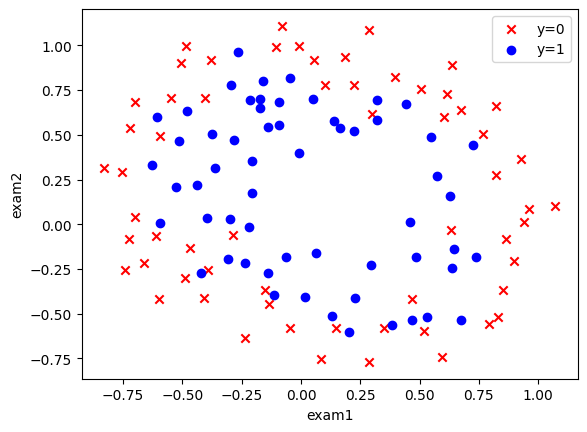

In [5]:
negative = data[data['Accepted'] == 0]
positive = data[data['Accepted'] == 1]

fig, ax = plt.subplots()
ax.scatter(negative['Exam1'], negative['Exam2'], c='r', marker='x', label='y=0')
ax.scatter(positive['Exam1'], positive['Exam2'], c='b', marker='o', label='y=1')
ax.legend()
ax.set_xlabel('exam1')
ax.set_ylabel('exam2')
plt.show()

## Feature Mapping
We can see that we need more features to fit this circular data. One way to do it is to map the features into all polynomial terms of x_1 and x_2 up to the sixth power:
mapFeature(x) = [1, x1, x2, x1^2, x1x2, x2^2, x1^3, ..., x1x2^5, x2^6]

In [6]:
def mapFeature(x1, x2, power):
    for i in range(1, power+1):
        for j in range(i+1):
            data['F{}{}'.format(i - j, j)] = np.power(x1, i - j) * np.power(x2, j)
    return pd.DataFrame(data)

In [7]:
x1 = data['Exam1']
x2 = data['Exam2']
data2 = mapFeature(x1, x2, 6)
data2.head()

,Exam1,Exam2,Accepted,F10,F01,F20,F11,F02,F30,F21,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,0.051267,0.69956,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,-0.092742,0.68494,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,-0.213710,0.69225,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,-0.375000,0.50219,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,-0.513250,0.46564,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [18]:
X2 = data2.iloc[:, 3:]
y2 = data2.iloc[:, 2]
theta2 = np.zeros(len(X2)-1)

In [19]:
X2.head()

,F10,F01,F20,F11,F02,F30,F21,F12,F03,F40,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,0.000007,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,0.000074,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,0.002086,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,0.019775,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,0.069393,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [20]:
y2.head()

0    1
1    1
2    1
3    1
4    1
Name: Accepted, dtype: int64

In [21]:
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values).T

In [37]:
theta2 = np.zeros((27,1))
theta2.shape

(27, 1)

## Cost function and gradient

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [25]:
def costFunctionReg(x, y, theta, lr):
    s = sigmoid(x @ theta)
    p1 = np.multiply(y, np.log(s))
    p2 = np.multiply((1-y), np.log(1-s))
    reg = np.sum(np.power(theta[1:], 2)) * (lr/(2*len(x)))
    return -(1/len(x)) * np.sum(p1-p2) + reg

In [27]:
def gradientReg(x, y, theta, alpha, iters, lr):
    m = len(x)
    costs = []
    for i in range(iters):
        reg = theta[1:] * (lr/m)
        reg = np.insert(reg,0,values=0,axis=0) # won't penalize theta_0
        s = sigmoid(x@theta)
        
        theta = theta - (alpha/m) * x.T @ (s - y) - reg*alpha
        cost = costFunctionReg(x, y, theta, lr)#计算每次迭代损失
        costs.append(cost)
    return theta, costs

In [38]:
alpha = 0.001
iters = 200000
lr = 0.01

theta_final, costs = gradientReg(X2, y2, theta2, alpha, iters, lr)

In [39]:
print(theta_final)

[[ 0.74361226]
 [ 1.71005462]
 [-0.63277756]
 [-1.61882438]
 [ 0.55703444]
 [ 0.33263333]
 [-0.71549032]
 [-0.38593477]
 [-0.28416319]
 [-1.77732573]
 [-0.08330982]
 [-0.85195881]
 [-0.41862211]
 [-1.45095049]
 [-0.38547716]
 [-0.39250143]
 [-0.03711013]
 [-0.5257639 ]
 [-0.36898408]
 [-1.01165497]
 [-1.59951866]
 [ 0.04850273]
 [-0.48326877]
 [ 0.04354607]
 [-0.57418689]
 [-0.17747469]
 [-1.68875746]]


In [42]:

def predict(X, theta):
    prob = sigmoid(X @ theta)
    return [1 if x >= 0.5 else 0 for x in prob]
 
 
y_ = np.array(predict(X2, theta_final))
print(y_)
y_pre = y_.reshape(len(y_), 1)
# 求取均值
acc = np.mean(y_pre == y2)
print(acc)

[1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0]
0.6949152542372882
